In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

In [2]:
df=pd.read_csv("emails.csv",delimiter=",")

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.shape

(5728, 2)

<AxesSubplot:xlabel='spam', ylabel='count'>

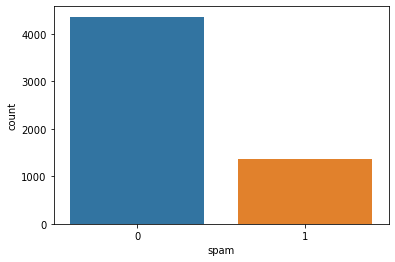

In [5]:
sns.countplot(x=df["spam"])

In [6]:
df["text"]=df["text"].str.lower()

In [7]:
df["text"]=df["text"].str.replace("\d+","")

In [8]:
df["text"]=df["text"].str.replace("\n","").replace("\r","")

In [9]:
df["text"]=df["text"].str.replace("[^\w\s]","")

In [10]:
df.head(10)

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is...,1
2,subject unbelievable new homes made easy im w...,1
3,subject color printing special request addit...,1
4,subject do not have money get software cds fr...,1
5,subject great nnews hello welcome to medzonl...,1
6,subject here s a hot play in motion homeland...,1
7,subject save your money buy getting this thing...,1
8,subject undeliverable home based business for...,1
9,subject save your money buy getting this thing...,1


In [11]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [12]:
def wc(data,bgcolor):
    plt.figure(figsize=(5,5))
    mask=np.array(Image.open("u6otn211fuhgzwtpuivb.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate("".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [13]:
ham=df[df["spam"]==0]["text"]

In [14]:
ham

1368    subject hello guys   i  m  bugging you  for yo...
1369    subject sacramento weather station  fyi       ...
1370    subject from the enron india newsdesk  jan  th...
1371    subject re  powerisk   your invitation  angeli...
1372    subject re  resco database and customer captur...
                              ...                        
5723    subject re  research and development charges t...
5724    subject re  receipts from visit  jim   thanks ...
5725    subject re  enron case study update  wow  all ...
5726    subject re  interest  david   please  call shi...
5727    subject news  aurora    update  aurora version...
Name: text, Length: 4360, dtype: object

In [15]:
spam=df[df["spam"]==1]["text"]

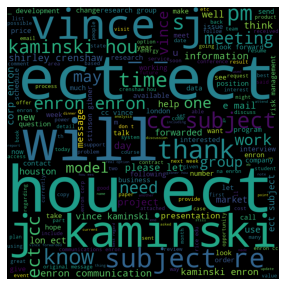

In [16]:
wc(ham,"black")

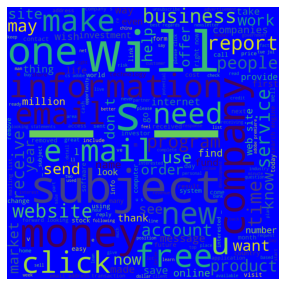

In [17]:
wc(spam, "blue")

In [18]:
y=df["spam"]
x=df["text"]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
vect=CountVectorizer(stop_words="english")

In [21]:
x=vect.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2,random_state=55)

In [24]:
mb=MultinomialNB()

In [25]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [26]:
accuracy_score(tahmin,y_test)

0.9930191972076788

In [27]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [28]:
r.fit(x,y)

RandomForestClassifier()

In [29]:
tahmin2=r.predict(x)

In [30]:
accuracy_score(tahmin2,y)

1.0